In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re

In [2]:
train_set = pd.read_csv("movie_reviews.csv", encoding="latin1")
test_set = pd.read_csv("test_data.csv", encoding="latin1")

In [3]:
data = pd.read_csv("movie_reviews.csv", encoding="latin1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


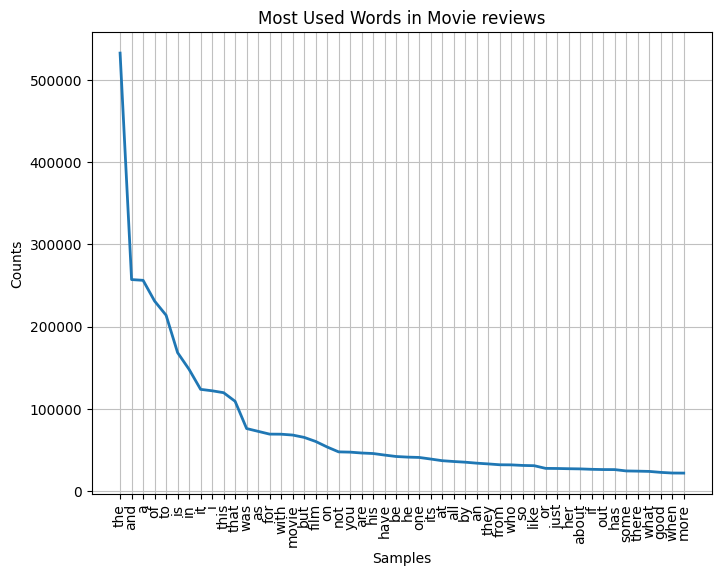

In [14]:
words_freq = nltk.FreqDist(word for text in data["text"] for word in text.lower().split())
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Movie reviews")
words_freq.plot(50)
plt.show()

In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [4]:
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["text"]:
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)

In [5]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["label"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 10000)
(10000, 10000)
(30000,)
(10000,)


In [7]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train,y_train)


SVC()

In [14]:
cleanedTestData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in test_set["text"]:
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedTestData.append(text)

In [15]:
BOW_test = vectorizer.fit_transform(cleanedTestData)

In [18]:
predictions = model.predict(BOW_test)

In [19]:
test_set["predictions"] = predictions

In [21]:
sub = pd.DataFrame({
    'Id': test_set['Id'],
    'Category':test_set['predictions']
})
sub.to_csv('SVM_prediction.csv', index=False)